IA & Data science (LU3IN0226) -- 2024-2025
--------
*&copy; Equipe p√©dagogique: Christophe Marsala, Olivier Schwander, Jean-No√´l Vittaut.*


#  Semaine 3 : algorithme du perceptron de Rosenblatt

<font size="+1" color="RED">**[Q]**</font> **Indiquer dans la bo√Æte ci-dessous vos noms et pr√©noms :**

Ines HARRAOUI
Yanis SAADI DIT SAADA 

<font color="RED" size="+1">**[Q]**</font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>tme-03</tt> et rajouter √† la suite de <tt>tme-03</tt> les noms des membres du bin√¥mes s√©par√©s par un tiret.

<font color="RED" size="+1">IMPORTANT: soumission de votre fichier final</font>

**Nom √† donner au fichier √† poster** : *tme-03-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du bin√¥me
- ne pas compresser ou faire une archive: il faut rendre le fichier ipython tel quel, √©ventuellement, si vous avez d'autres fichiers vous les rendez s√©par√©ment.

**Echancier pour la soumission de votre compte-rendu:**
- le compte-rendu d'une s√©ance doit √™tre remis obligatoirement <font color="RED">avant la s√©ance suivante</font>.

**Le compte-rendu est soumis sur la page Moodle.**

Les imports suivants seront g√©n√©ralement n√©cessaires:

In [ ]:
# - - - - - - - - - - - - - - - - - -
# imports utiles
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mtpl
%matplotlib inline  

import math
import time
import sys

# Les instructions suivantes sont utiles pour recharger automatiquement 
# le code modifi√© dans les librairies externes
%load_ext autoreload
%autoreload 2

# - - - - - - - - - - - - - - - - - -
#¬†Information sur l'environnent utilis√© ici:
print("Version python et des librairies:")
print("\tPython ",sys.version)
print("\tpandas: ",pd.__version__)
print("\tnumpy: ",np.__version__)
print("\tmatplotlib: ",mtpl.__version__)



## Retour sur le sujet du TME 2

In [ ]:
# ------------------------ REPRENDRE ICI LES FONCTIONS SUIVANTES DU TME 2:
#¬†genere_dataset_uniform:

def genere_dataset_uniform(d, nc, binf=-1, bsup=1):
    """ int * int * float^2 -> tuple[ndarray, ndarray]
        Hyp: n est pair
        d: nombre de dimensions de la description
        nc: nombre d'exemples de chaque classe
        les valeurs g√©n√©r√©es uniform√©ment sont dans [binf,bsup]
    """
    
    data_desc = np.random.uniform(binf,bsup,(2*nc,d))

    data_label = np.array([-1 for i in range(0,nc)] + [+1 for i in range(0,nc)])

    return (data_desc,data_label)

# genere_dataset_gaussian:

def genere_dataset_gaussian(positive_center, positive_sigma, negative_center, negative_sigma, nc):
    """ les valeurs g√©n√©r√©es suivent une loi normale
        rend un tuple (data_desc, data_labels)
    """
    data_negatifs = np.random.multivariate_normal(negative_center, negative_sigma, nc)
    data_positifs = np.random.multivariate_normal(positive_center, positive_sigma, nc)

    data_desc = np.vstack((data_negatifs, data_positifs))

    data_labels = np.array([-1 for i in range(0,nc)] + [+1 for i in range(0,nc)])

    return data_desc, data_labels

# plot2DSet:

def plot2DSet(desc,labels,nom_dataset= "Dataset", avec_grid=False):    
    """ ndarray * ndarray * str * bool-> affichage
        nom_dataset (str): nom du dataset pour la l√©gende
        avec_grid (bool) : True si on veut afficher la grille
        la fonction doit utiliser la couleur 'red' pour la classe -1 et 'blue' pour la +1
    """

    data2_negatifs = desc[labels == -1]
    data2_positifs = desc[labels == +1]

    #¬†Trac√© de l'ensemble des exemples :
    plt.scatter(data2_negatifs[:,0],data2_negatifs[:,1],marker='o', color="red", label='classe -1') # 'o' rouge pour la classe -1
    plt.scatter(data2_positifs[:,0],data2_positifs[:,1],marker='x', color="blue", label='classe +1') # 'x' bleu pour la classe +1

    #¬†Informations d'affichage :
    plt.title("data2")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.legend()
    plt.grid()  #¬†Grille: √† mettre, ou pas

    # Visualisation du r√©sultat
    plt.show()



#¬†plot_frontiere:

def plot_frontiere(desc_set, label_set, classifier, step=30):
    """ desc_set * label_set * Classifier * int -> NoneType
        Remarque: le 4e argument est optionnel et donne la "r√©solution" du trac√©: plus il est important
        et plus le trac√© de la fronti√®re sera pr√©cis.        
        Cette fonction affiche la fronti√®re de d√©cision associ√©e au classifieur
    """
    mmax=desc_set.max(0)
    mmin=desc_set.min(0)
    x1grid,x2grid=np.meshgrid(np.linspace(mmin[0],mmax[0],step),np.linspace(mmin[1],mmax[1],step))
    grid=np.hstack((x1grid.reshape(x1grid.size,1),x2grid.reshape(x2grid.size,1)))
    
    # calcul de la prediction pour chaque point de la grille
    res=np.array([classifier.predict(grid[i,:]) for i in range(len(grid)) ])
    res=res.reshape(x1grid.shape)
    # tracer des frontieres
    #¬†colors[0] est la couleur des -1 et colors[1] est la couleur des +1
    plt.contourf(x1grid,x2grid,res,colors=["darksalmon","skyblue"],levels=[-1000,0,1000])


In [ ]:
# Exemple d'utilisation:
np.random.seed(42)   #¬†on prend 42 comme graine

#¬†On g√©n√®re un dataset de 200 exemples en dimension 2:
data_gauss_desc, data_gauss_label = genere_dataset_gaussian(np.array([1,1]),np.array([[1,0],[0,1]]),np.array([-0.5,-1]),np.array([[1,0],[0,1]]),100)

print("Taille du dataset g√©n√©r√© :", np.shape(data_gauss_desc), "exemples")

print("Les 5 premiers exemples :")
print(type(data_gauss_desc), '\n', data_gauss_desc[0:5,:])

# Affichage des exemples g√©n√©r√©s:
plot2DSet(data_gauss_desc, data_gauss_label)

## Remarque sur la g√©n√©ration de nombres al√©atoires

Dans nos notebooks, on utilise la commande `np.random.seed(42) ` comme graine pour le g√©n√©rateur de nombres al√©atoires car cela vous permet de comparer vos r√©ponses aux n√¥tres. Mais cela n'est utilis√© que pour la mise au point, une fois que vos fonctions / instructions sont mises au point, il est **important** que vous r√©alisiez d'autres exp√©rimentations en faisant varier la graine, voire sans utiliser l'instruction `seed` avant de lancer vos fonctions.

## Evaluation d'un algorithme d'apprentissage

Un algorithme d'apprentissage permet de construire ou mettre au point un mod√®le de pr√©diction qui pourra donner (on dit aussi pr√©dire), pour tout nouvel exemple, le label √† associer √† cet exemple.
Si on conna√Æt par ailleurs le vrai label de l'exemple, le label trouv√© par le mod√®le est compar√© √† ce vrai label et on peut donc d√©terminer si le mod√®le s'est tromp√© ou s'il a raison.

Soit $f$ un mod√®le. Etant donn√© un ensemble $\bf X$ contenant $n$ exemples, et $Y$ l'ensemble des labels associ√©s √† ces exemples, tels que pour tout $\bf x_i \in \bf X$, $y_i$ est le label correspondant.

Un exemple $\bf x_i$ tel que $f(\bf x_i) = y_i$ est dit *bien class√© par $f$*.
Un exemple $\bf x_i$ tel que $f(\bf x_i) \not= y_i$ est dit *mal class√© par $f$*.

#### Taux de bonne classification
Le **taux de bonne classification** (ou *accuracy*) obtenu par $f$ pour les donn√©es de l'ensemble $\bf X$ est: 
$$\frac{n_{bc}}{n}$$

avec $n_{bc}$ le nombre d'exemples $\bf x_i$ de $\bf X$ bien class√©s par $f$, c'est-√†-dire pour lesquels $f(\bf x_i) = y_i$.


#### Performance d'un mod√®le
Un mod√®le appris gr√¢ce √† un algorithme d'apprentissage peut √™tre √©valu√© sur 2 aspects:
- sa capacit√© √† rendre compte des donn√©es qui ont servi √† le mettre au point : on √©value cela en mesurant son taux de bonne classification (ou *accuracy*) sur des donn√©es d'apprentissage.
- sa capacit√© √† **g√©n√©raliser** ce qu'il a appris sur des donn√©es qu'il ne conna√Æt pas : on √©value cela en mesurant son taux de bonne classification (ou *accuracy*)  sur des donn√©es diff√©rentes de celles utilis√©es en apprentissage, on parle de **donn√©es test**.

Ainsi, un mod√®le appris qui est tr√®s performant sur les donn√©es d'apprentissage, mais qui a performances tr√®s faibles en pr√©diction sur d'autres donn√©es n'est souvent pas tr√®s int√©ressant. La capacit√© de g√©n√©raliser est ce que l'on recherche en premier lieu pour un bon mod√®le.

#### Ensemble d'apprentissage et ensemble de test
Pour √©valuer un mod√®le appris $f$, on a donc besoin de 2 ensembles d'exemples pour lesquels on conna√Æt le label:
- la **base d'apprentissage** (ou *training set*): il est compos√© d'un ensemble d'exemples $\bf X$ associ√© √† un ensemble de labels correspondant $Y$. La base d'apprentissage est l'ensemble que l'on utilise pour mettre au point le mod√®le lors de la phase *train*.
    - pour le knn, la base d'apprentissage correspond √† l'ensemble que l'on m√©morise.
    - pour le perceptron, la base d'apprentissage est utilis√©e pour trouver le bon param√©trage du mod√®le.
- la **base de test** (ou *test set*): il est compos√© d'un ensemble d'exemples $\bf X_t$ associ√© √† un ensemble de labels correspondant $Y_t$. Les exemples de la base de test ne sont pas utilis√©s durant la phase d'apprentissage. Ces exemples ne sont utilis√©s que pour calculer un taux de bonne classification du mod√®le.

#### Evaluation d'un mod√®le
Pour √©valuer correctement un mod√®le, on doit fournir 2 taux de bonne classification(ou *accuracy*) :
- le taux de bonne classification sur la base d'apprentissage;
- le taux de bonne classification sur une base de test.


## Construction d'une base d'apprentissage et d'une base de test

Dans la pratique, on poss√®de g√©n√©ralement une seule base d'exemples (cf. donn√©es USPS du TME 2) √† partir de laquelle on construit les 2 bases n√©cessaires.
Soit $\bf X$ un ensemble de $n$ exemples et $Y$ l'ensemble des labels associ√©s (ie. tout $\bf x_i \in \bf X$ a pour label $y_i \in Y$, pour $i=1,.., n$).

- la base d'apprentissage $(\bf X_{train}, Y_{train})$ est construite en s√©lectionnant al√©atoirement $n_+$ exemples de label $+1$ et $n_-$ exemples de labels $-1$ (g√©n√©ralement $n_+ = n_-$).
- la base de test $(\bf X_{test}, Y_{test})$ est construire en prenant tous les exemples de $\bf X$ qui n'ont pas √©t√© s√©lectionn√©s dans $\bf X_{train}$.


<font color="RED" size="+1">**[Q]**</font>  Ecrire la fonction `genere_train_test` qui, √©tant donn√© deux `ndarray`, un donnant des descriptions et l'autre les labels correspondants, rend 2 tuples:
- le premier tuple correspond √† la base d'apprentissage $(\bf X_{train}, Y_{train})$
- le deuxi√®me tuple correspond √† la base de test $(\bf X_{test}, Y_{test})$

Pour √©crire cette fonction, on peut utiliser la fonction `random.sample` de la librairie `random` (attention, cette librairie contient des fonctions diff√©rentes des fonctions random de la librairie numpy que l'on a utilis√© jusqu'√† pr√©sent).
La fonction `random.sample` prend 2 arguments: une liste $L$ et un entier $k$, et elle rend $k$ √©l√©ments de $L$ choisis al√©atoirement (sans remise).

In [ ]:
# Exemple d'utilisation de la fonction random.sample:

import random
random.seed(42)  #¬†pour avoir les m√™mes tirages

#¬†Choix al√©atoire de 5 √©l√©ments de la liste:
random.sample([i for i in range(0,100)], 5)

In [ ]:
# A quoi correspond le r√©sultat de cette commande ?: L contient 10 indices al√©atoires sur le nombre de lignes dans data_gauss_desc

L = random.sample([i for i in range(0,data_gauss_desc.shape[0])],10)
data_gauss_desc[L]

In [ ]:
# A quoi correspond le r√©sultat de cette commande ?: 100 exemples de classe -1 chacun de dimension 2
data_gauss_desc[data_gauss_label == -1 ].shape 

Ainsi, si la liste L contient les indices de tous les exemples d'une base d'exemples, il devient facile de s√©lectionner un sous-ensemble de ces exemples en tirant al√©atoirement leurs indices par cette fonction.

In [ ]:
# ------------------------ A COMPLETER
def genere_train_test(desc_set, label_set, n_pos, n_neg):
    """ permet de g√©n√©rer une base d'apprentissage et une base de test
        desc_set: ndarray avec des descriptions
        label_set: ndarray avec les labels correspondants
        n_pos: nombre d'exemples de label +1 √† mettre dans la base d'apprentissage
        n_neg: nombre d'exemples de label -1 √† mettre dans la base d'apprentissage
        Hypoth√®ses: 
           - desc_set et label_set ont le m√™me nombre de lignes)
           - n_pos et n_neg, ainsi que leur somme, sont inf√©rieurs √† n (le nombre d'exemples dans desc_set)
    """

    random.seed(42)
    
    #listes des indices des exemples de classe 1 et -1
    L_pos = [i for i in range(len(label_set)) if label_set[i] == 1]
    L_neg = [i for i in range(len(label_set)) if label_set[i]== -1]

    #liste des indices des exemples √† entrainer
    train_pos = random.sample(list(L_pos), n_pos)
    train_neg = random.sample(list(L_neg), n_neg)

    #liste des indices des exemples √† tester
    L_test = [i for i in range(desc_set.shape[0]) if i not in train_pos and i not in train_neg]

    return (desc_set[train_pos + train_neg],label_set[train_pos + train_neg]), (desc_set[L_test],label_set[L_test])


<font color="RED" size="+1">**[Q]**</font>  Utiliser la fonction pr√©c√©dente pour g√©n√©rer une base d'apprentissage et une base de test √† partir des donn√©es al√©atoires gaussiennes g√©n√©r√©es plus haut. La base d'apprentissage contiendra 75 exemples de la classe +1 et 75 exemples de la classe -1.

In [ ]:
random.seed(42)
(train_desc, train_label), (test_desc, test_label) = genere_train_test(data_gauss_desc, data_gauss_label,75,75)

print("Base d'apprentissage: ",train_desc.shape, " et ", len(train_label)," labels")
print("Base de test: ",test_desc.shape, " et ", len(test_label)," labels")

## Perceptron de Rosenblatt

De la m√™me fa√ßon que nous avons d√©fini des classes pour le classifieur par k-ppv et le classifieur lin√©aire al√©atoire, nous allons maintenant d√©finir une nouvelle classe de classifieurs pour impl√©menter un nouvel algorithme d'apprentissage : le **perceptron de Rosenblatt**.

<div class="alert alert-block alert-info">

**Apprentissage d'un perceptron**<BR>
L'apprentissage d'un perceptron consiste √† partir d'une base de donn√©es √©tiquet√©es $\mathbf X \in \mathbb R^{n\times d}, \mathbf Y\in \{-1,1\}^n$ de fournir un **vecteur de param√®tres** optimis√©s, de dimension $d$, $\mathbf w\in \mathbb R^{d}$.

Le perceptron est repr√©sent√© par le vecteur $\mathbf w$ et on utilise comme param√®tre pour le mettre au point un *learning rate* $\epsilon \in [0,1]$ qui est d√©fini √† la cr√©ation du classifieur (param√®tre du constructeur).
    
En termes algorithmiques, l'apprentissage est it√©ratif:
1. Initialisation de $\mathbf w$: il y a 2 fa√ßons possibles (√† choisir), $\mathbf w$ est initialis√© soit comme vecteur nul (toutes ses composantes √† 0), soit al√©atoirement. 
    
    *Attention, si l'initialisation est al√©atoire, **les valeurs doivent √™tre tr√®s petites** et √©galement r√©parties entre valeurs positives et n√©gatives pour ne pas biaiser l'algorithme. On pourra dans ce cas pour g√©n√©rer chaque composante de $\mathbf w$: 1) g√©n√©rer al√©atoirement une valeur $v$ dans $[0,1[$, 2) la transformer en $2v-1$ pour qu'elle soit dans $[-1,1[$, puis 3) la multiplier par un nombre r√©el positif petit (par exemple $0.001$) pour obtenir une valeur tr√®s petite.*
1. Optimisation stochastique gr√¢ce √† la base d'apprentissage $\mathbf X$:
    1. Choisir al√©atoirement un exemple $\mathbf x_i$ de $\mathbf X$
    1. Calculer le score $\hat y_i$ fourni par le perceptron par $\hat y_i = \mathbf x_i \cdot \mathbf w$ en utilisant le vecteur $\mathbf w$ courant
        - le label associ√© $\hat y_i^*$ obtenu en prenant le signe de $\hat y_i$ correspond √† la pr√©diction (+1 ou -1) faite par le perceptron pour $\mathbf x_i$.
    1. Evaluer l'erreur de pr√©diction pour $\mathbf x_i$, sachant que le label √† trouver doit √™tre $y_i$ (donn√© dans $\mathbf Y$). 
        1. Si *pas d'erreur*, pas de correction √† faire
        1. Si *erreur*, corriger $\mathbf w$ par : 
        $$\mathbf w \leftarrow \mathbf w + \epsilon y_i \mathbf x_i$$
       
    1. Arr√™ter lorsqu'il y a convergence:
        1. Convergence = aucun ou peu de changements sur $\mathbf w$ pendant $n$ it√©rations. Pour √©valuer le changement, on calcule la norme de la valeur absolue de la diff√©rence terme √† terme entre $w$ (vecteur avant l'√©tape 2) et $w'$ (vecteur apr√®s l'√©tape 2). Il y a convergence quand cette valeur descend en dessous d'un seuil de convergence (qui est un r√©el positif non nul).
        1. Remarque : on peut fixer un nombre d'it√©rations maximum au bout desquelles l'algorithme doit s'arr√™ter pour ne pas se coincer dans une boucle infinie.

**Classification / Pr√©diction / Inf√©rence avec un perceptron**<BR>
L'inf√©rence est lin√©aire: 
    $$\hat y_i =  \mathbf x_i \cdot \mathbf w , \qquad \hat y_i^* =\text{sign}(\hat y_i) \in \{-1,1\}$$
   
   $\hat y_i$ correspond au score fourni par le perceptron (valeur r√©elle donc) et $y_i^*$ correspond √† la pr√©diction (+1 ou -1).
    
<br/>
<b>Remarque:</b> attention √† ne pas confondre l'√©valuation lin√©aire √† valeur r√©elle et le signe qui permet de mettre notre estimation dans le m√™me univers que les √©tiquettes d'origine.
    
    
</div>    

<font color="RED" size="+1">**[Q]**</font> En h√©ritant de la classe `Classifier` (qu'il faut donc r√©cup√©rer pour la mettre dans ce notebook), √©crire la classe `ClassifierPerceptron` qui impl√©mente l'algorithme du perceptron de Rosenblatt vu en cours. 

Lors de l'initialisation, dans la m√©thode `__init__`, deux param√®tres seront fournis:
- le learning_rate (`epsilon`) du perceptron (par d√©faut, il sera mis √† $0.01$). 
- un argument bool√©en de nom `init` qui vaut `True` (par d√©faut) ou `False` et qui donne le mode souhait√© d'initialisation du perceptron: soit en mettant les poids $w_1, \ldots, w_d$ √† 0 (valeur `True`), soit en les initialisant al√©atoirement par des valeurs tr√®s petites (valeur `False`) comme expliqu√© dans le descriptif ci-dessus.

Pour l'apprentissage du perceptron, on √©crit les 2 fonctions suivantes.

La fonction `train_step` r√©alise **une unique it√©ration de tous les exemples** du dataset d'apprentissage $\mathbf X$ en prenant ces exemples dans un ordre al√©atoire (cf. shuffle expliqu√© ci-apr√®s). Cet ordre doit √™tre tir√© al√©atoirement au moment de l'ex√©cution de la fonction `train_step` (√† chaque lancement de `train_step`, l'ordre devra donc √™tre diff√©rent). Une fois un exemple $\mathbf x$ choisi, on applique l'algorithme expliqu√© dans le cadre pr√©c√©dent.

La fonction `train` impl√©mente l'algorithme complet de l'apprentissage it√©ratif du perceptron jusqu'√† sa convergence (elle appelle donc la fonction `train_step`). Elle prend en argument, en plus du dataset, un entier `nb_max` qui donne le nombre d'it√©rations maximal √† r√©aliser, et un r√©el `seuil` qui donne le seuil de convergence √† atteindre. Cette fonction rend la liste des valeurs des diff√©rences rencontr√©es.

Remarque: quelques fonctions utiles :
- la fonction `np.zeros` qui prend en argument un entier. Par exemple, tester `np.zeros(10)`.
- la fonction `np.random.shuffle` qui prend une liste de valeurs en arguments et la modifie (par effet de bord) en r√©ordonnant al√©atoirement les valeurs.
- pour copier un `np.array`, il est n√©cessaire d'utiliser la m√©thode `copy()` qui r√©alise une copie profonde. Par exemple, `B = A.copy()` pour copier le `np.array A` dans la variable `B`.

**IMPORTANT**: dans tous les exemples ci-dessous, on utilise toujours la m√™me graine (seed) de g√©n√©ration de nombres al√©atoires, ceci pour vous permettre de mettre au point vos fonctions, une fois qu'elles sont mises au point, il vous faut alors r√©aliser des exp√©rimentations **sans utiliser de graine**.

In [ ]:
#¬†Par exemple :

np.random.seed(42)   #¬†on prend 42 comme graine

l =[i for i in range(0,10)]
print("Avant: ",l)
np.random.shuffle(l)
print("Apr√®s: ",l)

In [60]:
# ------------------------ A COMPLETER :

# Recopier ici la classe Classifier (compl√®te) du TME 2
# ------------------------ A COMPLETER :
class Classifier:
    """ Classe (abstraite) pour repr√©senter un classifieur
        Attention: cette classe est ne doit pas √™tre instanci√©e.
    """
    
    def __init__(self, input_dimension):
        """ Constructeur de Classifier
            Argument:
                - intput_dimension (int) : dimension de la description des exemples
            Hypoth√®se : input_dimension > 0
        """
        self.dimension = input_dimension
        
    def train(self, desc_set, label_set):
        """ Permet d'entrainer le modele sur l'ensemble donn√©
            desc_set: ndarray avec des descriptions
            label_set: ndarray avec les labels correspondants
            Hypoth√®se: desc_set et label_set ont le m√™me nombre de lignes
        """        
        raise NotImplementedError("Please Implement this method")
    
    def score(self,x):
        """ rend le score de pr√©diction sur x (valeur r√©elle)
            x: une description
        """
        raise NotImplementedError("Please Implement this method")
    
    def predict(self, x):
        """ rend la prediction sur x (soit -1 ou soit +1)
            x: une description
        """
        raise NotImplementedError("Please Implement this method")

    def accuracy(self, desc_set, label_set):
        """ Permet de calculer la qualit√© du syst√®me sur un dataset donn√©
            desc_set: ndarray avec des descriptions
            label_set: ndarray avec les labels correspondants
            Hypoth√®se: desc_set et label_set ont le m√™me nombre de lignes
        """
        cpt =np.sum(self.predict(desc_set[i])==label_set[i] for i in range(len(desc_set)))

        return cpt / len(label_set)



In [68]:
# ------------------------ A COMPLETER : DEFINITION DU CLASSIFIEUR PERCEPTRON

class ClassifierPerceptron(Classifier):
    """ Perceptron de Rosenblatt
    """
    def __init__(self, input_dimension, learning_rate=0.01, init=True ):
        """ Constructeur de Classifier
            Argument:
                - input_dimension (int) : dimension de la description des exemples (>0)
                - learning_rate (par d√©faut 0.01): epsilon
                - init est le mode d'initialisation de w: 
                    - si True (par d√©faut): initialisation √† 0 de w,
                    - si False : initialisation par tirage al√©atoire de valeurs petites
        """
        Classifier.__init__(self,input_dimension)
        self.learning_rate = learning_rate
        if init == True:
            self.w = np.zeros(input_dimension)        
        else:
            self.w = np.array([(2 * np.random.uniform(0, 1) - 1) * 0.001 for _ in range(input_dimension)])
                
    def train_step(self, desc_set, label_set):
        """ R√©alise une unique it√©ration sur tous les exemples du dataset
            donn√© en prenant les exemples al√©atoirement.
            Arguments:
                - desc_set: ndarray avec des descriptions
                - label_set: ndarray avec les labels correspondants
        """        
        indices = np.arange(len(desc_set))
        np.random.shuffle(indices)

        for i in indices:
            x = desc_set[i]
            y = label_set[i]
            predic = np.dot(x,self.w)  
            
            if y * predic <= 0:
                self.w += self.learning_rate*y*x
                   
    def train(self, desc_set, label_set, nb_max=100, seuil=0.001):
        """ Apprentissage it√©ratif du perceptron sur le dataset donn√©.
            Arguments:
                - desc_set: ndarray avec des descriptions
                - label_set: ndarray avec les labels correspondants
                - nb_max (par d√©faut: 100) : nombre d'it√©rations maximale
                - seuil (par d√©faut: 0.001) : seuil de convergence
            Retour: la fonction rend une liste
                - liste des valeurs de norme de diff√©rences
        """        
        diff = []
        copie = self.w.copy() #ancien w
        for _ in range(nb_max):
            self.train_step(desc_set, label_set)
            diff.append(np.linalg.norm(self.w - copie))

            if np.linalg.norm(self.w - copie) < seuil:
                break  
            copie = self.w.copy() #ancien w

        return diff
        
    def score(self,x):
        """ rend le score de pr√©diction sur x (valeur r√©elle)
            x: une description
        """
        return np.dot(self.w, x)
    
    def predict(self, x):
        """ rend la prediction sur x (soit -1 ou soit +1)
            x: une description
        """
        return 1 if self.score(x) >= 0 else -1

    

## Validation de l'algorithme

<font color="RED" size="+1">**[Q]**</font>  Afin de v√©rifier le bon fonctionnement de l'algorithme, nous allons proc√©der √† plusieurs tests:

1. Exp√©rimentation avec les gaussiennes jouets d√©finies dans le TME 2
    1. V√©rifier l'impact du r√©glage de l'initialisation (normalement, il n'y a pas trop d'impact sur un probl√®me aussi simple)
    1. V√©rifier l'impact du r√©glage de epsilon (impact √©norme: ca diverge tr√®s rapidement!!)
    1. En jouant sur la g√©n√©ration des donn√©es, tester votre perceptron dans le cas facile (nuages des deux classes bien s√©par√©s) puis dans le cas plus difficile o√π les classes ne sont plus s√©parables lin√©airement.

1. Exp√©rimentation avec les donn√©es USPS (cf. TME 2)
    1. Nous travaillerons uniquement dans le cas binaire. Prendre les 1 vs 2 (cas facile) puis les 3 vs 6 ou 9 (cas nettement plus dur)
    
1. Penser √† faire le parall√®le avec le temps pour pr√©dire avec les k-ppv de la semaine pr√©c√©dente
    
**Note:** il faut √©videmment multiplier les boites et ne pas tout faire au m√™me endroit.

### Test sur des gaussiennes jouets

#### Apprentissage pas √† pas et variation d'accuracy

C:\Users\inese\AppData\Local\Temp\ipykernel_17996\3507844454.py:44: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  cpt =np.sum(self.predict(desc_set[i])==label_set[i] for i in range(len(desc_set)))


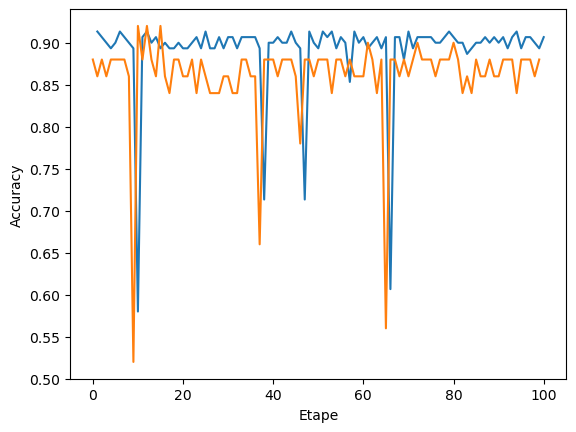

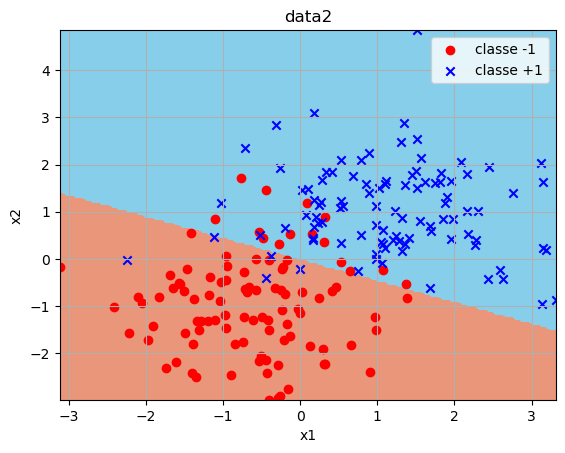

Accuracy finale (train):  0.9066666666666666
Accuracy finale (test) :  0.88


In [73]:
# ------------------------ COMPLETER LES INSTRUCTIONS DANS CETTE BOITE 

np.random.seed(42)   # on prend 42 comme graine pour tester

# -----
# Cr√©ation d'un perceptron avec initialisation √† 0 et le learning_rate ci-dessous:
learning_rate = 0.01
perceptron1 = ClassifierPerceptron(2,learning_rate)

# -----
# D√©finition des donn√©es d'apprentissage (on reprend les donn√©es data_gauss g√©n√©r√©es plus haut)
random.seed(42)
(train_desc, train_label), (test_desc, test_label) = genere_train_test(data_gauss_desc, data_gauss_label,75,75)

data_train = train_desc
label_train = train_label
data_test = test_desc
label_test = test_label

# -----
# Apprentissage pas √† pas du perceptron et m√©morisation de l'accuracy √† chaque √©tape:
# Listes qui vont servir √† m√©moriser les accuracy du perceptron √† chaque √©tape:
train_acc = []
test_acc = []

# R√©alisation de N it√©rations
N = 100
for i in range(N):
    perceptron1.train_step(data_train, label_train) #iteration
    train_acc.append(perceptron1.accuracy(data_train, label_train))
    test_acc.append(perceptron1.accuracy(data_test, label_test))

# -----
# Tra√ßage de la courbe des variations d'accuracy
plt.plot(range(1,N+1),train_acc,test_acc)  
plt.ylabel('Accuracy')
plt.xlabel("Etape")
plt.show()

# -----
# Affichage de la fronti√®re de s√©paration des classes (en prenant tous les exemples de la base)
plot_frontiere(data_gauss_desc,data_gauss_label,perceptron1,step=150)
plot2DSet(data_gauss_desc,data_gauss_label)

print("Accuracy finale (train): ",  train_acc[-1])
print("Accuracy finale (test) : ", test_acc[-1])


### Apprentissage et affichage de la convergence

Nb iterations r√©alis√©es:  100


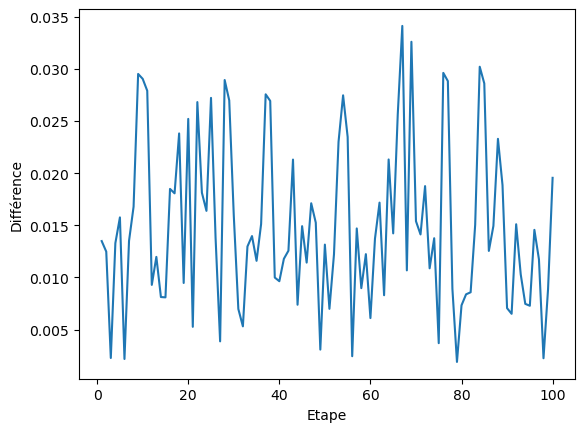

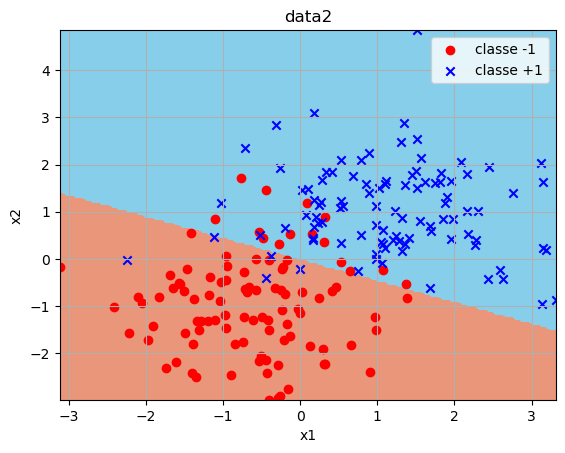

Accuracy finale (train):  0.9066666666666666
Accuracy finale (test) :  0.88


C:\Users\inese\AppData\Local\Temp\ipykernel_17996\3507844454.py:44: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  cpt =np.sum(self.predict(desc_set[i])==label_set[i] for i in range(len(desc_set)))


In [74]:
# ------------------------ COMPLETER LES INSTRUCTIONS DANS CETTE BOITE 

np.random.seed(42)   # on prend 42 comme graine

# Cr√©ation d'un perceptron avec initialisation √† 0 et le learning_rate ci-dessous:
learning_rate = 0.01
perceptron2 = ClassifierPerceptron(2, learning_rate)

# D√©finition des donn√©es d'apprentissage (on reprend les donn√©es data_gauss g√©n√©r√©es plus haut)
random.seed(42) 
(train_desc, train_label), (test_desc, test_label) = genere_train_test(data_gauss_desc, data_gauss_label,75,75)

data_train = train_desc
label_train = train_label
data_test = test_desc
label_test = test_label

# Apprentissage du perceptron jusqu'√† convergence
les_variations = perceptron2.train(data_train, label_train)
print("Nb iterations r√©alis√©es: ", len(les_variations))

# Tra√ßage de la courbe des variations
plt.plot(range(1,len(les_variations)+1),les_variations)  
plt.ylabel('Diff√©rence')
plt.xlabel("Etape")
plt.show()

# Affichage de la fronti√®re de s√©paration des classes
plot_frontiere( data_gauss_desc,data_gauss_label,perceptron2,150)
plot2DSet( data_gauss_desc,data_gauss_label )

print("Accuracy finale (train): ",  perceptron2.accuracy(data_train, label_train))
print("Accuracy finale (test) : ", perceptron2.accuracy(data_test, label_test))


### Initialisation al√©atoire et convergence

Nb iterations:  100


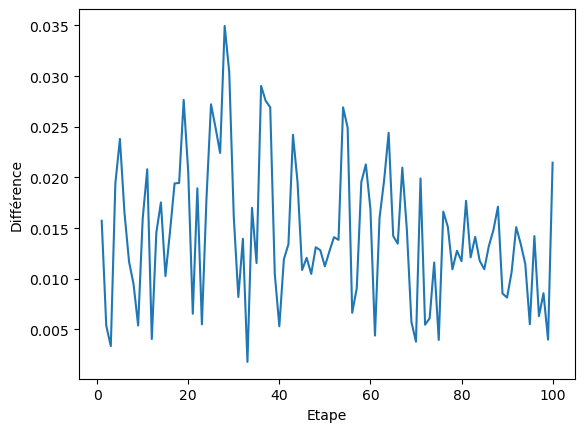

Accuracy finale (train):  0.9066666666666666
Accuracy finale (test) :  0.88


C:\Users\inese\AppData\Local\Temp\ipykernel_17996\3507844454.py:44: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  cpt =np.sum(self.predict(desc_set[i])==label_set[i] for i in range(len(desc_set)))


In [72]:
# ------------------------ COMPLETER LES INSTRUCTIONS DANS CETTE BOITE 

np.random.seed(42)   # on prend 42 comme graine

# Cr√©ation d'un perceptron avec initialisation al√©atoire et le learning_rate ci-dessous:
learning_rate = 0.01
perceptron3 = ClassifierPerceptron(2,learning_rate,False)

# D√©finition des donn√©es d'apprentissage (on reprend les donn√©es data_gauss g√©n√©r√©es plus haut)
random.seed(42) 
(train_desc, train_label), (test_desc, test_label) = genere_train_test(data_gauss_desc, data_gauss_label,75,75)

data_train = train_desc
label_train = train_label
data_test = test_desc
label_test = test_label

# Apprentissage du perceptron
les_variations = perceptron3.train(data_train,label_train)
print("Nb iterations: ", len(les_variations) )

# Tra√ßage de la courbe des variations
plt.plot(range(1,len(les_variations)+1),les_variations)  
plt.ylabel('Diff√©rence')
plt.xlabel("Etape")
plt.show()

print("Accuracy finale (train): ",  perceptron3.accuracy(data_train,label_train) )
print("Accuracy finale (test) : ", perceptron3.accuracy(data_test,label_test))


### Impact du learning rate

<font color="RED" size="+1">[Q]</font> Tester diff√©rentes valeurs de learning rate et regarder les r√©sultats en termes de convergence.

Par exemple, que se passe-t-il quand le learning rate est mis √† 0.1?

Accuracy finale (train):  0.9066666666666666
Accuracy finale (test) :  0.88


C:\Users\inese\AppData\Local\Temp\ipykernel_17996\3507844454.py:44: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  cpt =np.sum(self.predict(desc_set[i])==label_set[i] for i in range(len(desc_set)))


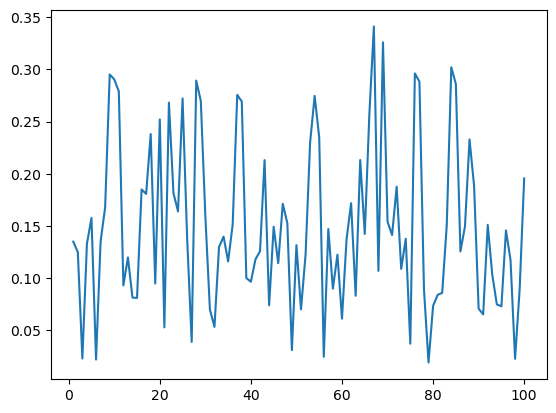

In [75]:
#¬†Par exemple : 

# ------------------------ COMPLETER LES INSTRUCTIONS DANS CETTE BOITE 

np.random.seed(42)   # on prend 42 comme graine

# D√©finition des donn√©es d'apprentissage (on reprend les donn√©es data_gauss g√©n√©r√©es plus haut)
random.seed(42) 
(train_desc, train_label), (test_desc, test_label) = genere_train_test(data_gauss_desc, data_gauss_label,75,75)

data_train = train_desc
label_train = train_label
data_test = test_desc
label_test = test_label

# Cr√©ation d'un perceptron avec initialisation al√©atoire et le learning_rate ci-dessous:
learning_rate = 0.1
perceptron4 = ClassifierPerceptron(2,learning_rate)
# Apprentissage du perceptron
les_variations = perceptron4.train(data_train,label_train)
# Tra√ßage de la courbe des variations
plt.plot(range(1,len(les_variations)+1), les_variations)
print("Accuracy finale (train): ", perceptron4.accuracy(data_train,label_train) )
print("Accuracy finale (test) : ", perceptron4.accuracy(data_test,label_test))


<font color="RED" size="+1">[Q]</font> Quand le learning rate est mis √† 0.01, en utilisant le param√®tre `nb_max`, trouver combien d'it√©rations sont n√©cessaires pour que l'algorithme converge.

Accuracy finale (train):  0.9066666666666666
Accuracy finale (test) :  0.88


C:\Users\inese\AppData\Local\Temp\ipykernel_17996\3507844454.py:44: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  cpt =np.sum(self.predict(desc_set[i])==label_set[i] for i in range(len(desc_set)))


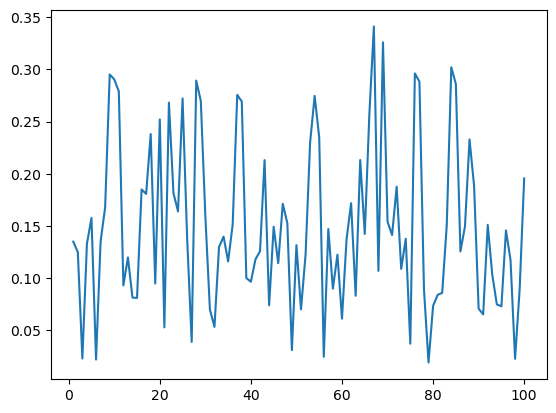

In [77]:
np.random.seed(42)   # on prend 42 comme graine

# ------------------------ COMPLETER LES INSTRUCTIONS DANS CETTE BOITE 

# D√©finition des donn√©es d'apprentissage (on reprend les donn√©es data_gauss g√©n√©r√©es plus haut)
random.seed(42) 
(train_desc, train_label), (test_desc, test_label) = genere_train_test(data_gauss_desc, data_gauss_label,75,75)

data_train = train_desc
label_train = train_label
data_test = test_desc
label_test = test_label

#¬†#############################¬†A COMPLETER POUR FOURNIR LE NOMBRE D'ITERATIONS NECESSAIRES

# Cr√©ation d'un perceptron avec initialisation al√©atoire et le learning_rate ci-dessous:
perceptron5 = ClassifierPerceptron(2,learning_rate)
# Apprentissage du perceptron
les_variations = perceptron5.train(data_train,label_train)
# Tra√ßage de la courbe des variations
plt.plot(range(1,len(les_variations)+1),les_variations)

print("Accuracy finale (train): ",perceptron5.accuracy(data_train,label_train) )
print("Accuracy finale (test) : ", perceptron5.accuracy(data_test,label_test) )


## Cas difficiles

<font color="RED" size="+1">[Q]</font> Afin de tester des cas plus difficiles (c'est-√†-dire non s√©parables lin√©airement), √©crire la fonction `createXOR` qui permet de g√©n√©rer le jeu de donn√©es ci-dessous. Cette fonction prend 2 arguments, un nombre de points $n$ et un r√©el positif $\sigma$ donnant la variance sur chaque dimension et permet de jouer sur la dispersion des nuages et donc sur la s√©paration des 4 nuages.

Il s'agit de g√©n√©rer des points dans deux classes mais selon 4 gaussiennes.

<img src="xor.png" width=300px>



In [ ]:
# ------------------------ COMPLETER LES INSTRUCTIONS DANS CETTE BOITE 
def create_XOR(n, var):
    """ int * float -> tuple[ndarray, ndarray]
        Hyp: n et var sont positifs
        n: nombre de points voulus
        var: variance sur chaque dimension

    positive_sigma ‚Üí Matrice de variance-covariance des points positifs.
    negative_sigma ‚Üí Matrice de variance-covariance des points n√©gatifs.

    Exemple d'utilisation de genere_dataset_gaussian :
        pos_center = np.array([1, 1])
        pos_sigma = np.array([[0.1, 0], [0, 0.1]])
        neg_center = np.array([0, 0])
        neg_sigma = np.array([[0.1, 0], [0, 0.1]])
        nc = 50

        data, labels = genere_dataset_gaussian(pos_center, pos_sigma, neg_center, neg_sigma, nc)
üîπ Ici, la fonction va g√©n√©rer 100 points :
        50 autour de (1,1) avec label +1
        50 autour de (0,0) avec label -1
    """
        
    data_desc1, data_label1 = genere_dataset_gaussian(np.array([1,0]),np.array([[var, 0],[0, var]]),np.array([0,0]),np.array([[var, 0],[0, var]]),n)
    data_desc, data_label = genere_dataset_gaussian(np.array([0,1]),np.array([[var, 0],[0, var]]),np.array([1,1]),np.array([[var, 0],[0, var]]),n)
    return (np.concatenate((data_desc1, data_desc)), np.concatenate((data_label1, data_label)))

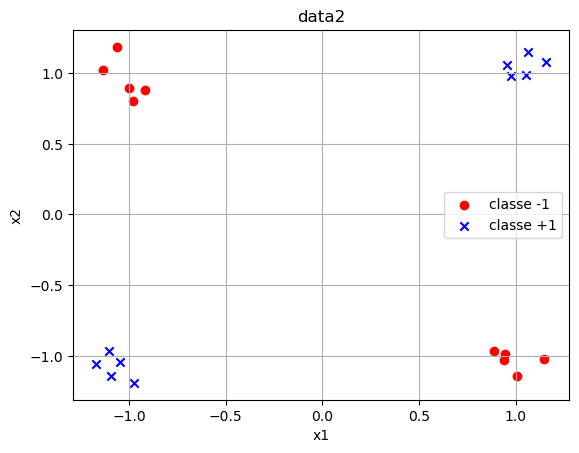

In [79]:
# une fois le fichier d'outils mis √† jour, vous devez pouvoir faire:

np.random.seed(42)   #¬†on prend 42 comme graine

#¬†G√©n√©ration d'un dataset avec 80 points:
data_xor, label_xor = create_XOR(20,0.01)
plot2DSet(data_xor, label_xor)

<font color="RED" size="+1">[Q]</font> Appliquer l'algorithme du perceptron sur ces donn√©es et constater (avec quelques affichages de performances et trac√©s de fronti√®res de d√©cision) que √ßa ne marche pas!

In [80]:
np.random.seed(42)   # on prend 42 comme graine

# Cr√©ation d'un perceptron
perceptron_xor = ClassifierPerceptron(2,0.01)

#¬†------------------------ A COMPLETER :


(train_desc, train_label), (test_desc, test_label) = genere_train_test(data_xor, label_xor,20,20)

data_train = train_desc
label_train = train_label
data_test = test_desc
label_test = test_label

# Affichage de la fronti√®re de s√©paration des classes
plot_frontiere(data_xor,label_xor,perceptron2,step=150)
plot2DSet(data_xor,label_xor)


ValueError: Sample larger than population or is negative

## Exp√©rimentations

Compl√©ter ce notebook par des exp√©rimentations sur le Perceptron, par exemple :
1. Test sur les donn√©es USPS (cf. TME 2)
    1. Pour r√©duire la place disque prise par la base USPS, commencer par faire un lien symbolique avec la commande 
    
        `ln -s ../tme-02/data/ .` 
    
       lanc√©e depuis un terminal, en vous pla√ßant dans votre r√©pertoire `tme-03`.
    1. Nous travaillerons uniquement dans le cas binaire. Prendre les 1 vs 2 (cas facile) puis les 3 vs 6 ou 9 (cas nettement plus dur)
    
1. Comparer les temps de classification avec les k-ppv de la semaine pr√©c√©dente
